In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import multiprocessing as mul
from scipy import stats
import pickle
from scipy.integrate import quad
from corner import corner
import pandas as pd
from scipy.stats import gaussian_kde
import dynesty as dyn

In [2]:
GRBs = ['GRB210619B', 'GRB210610B', 'GRB210204A', 'GRB201216C', 'GRB200829A', 'GRB200613A', 'GRB190114C', 'GRB180720B', 'GRB180703A', 'GRB171010A', 'GRB160625B', 'GRB160509A', 'GRB150821A', 'GRB150514A', 'GRB150403A', 'GRB150314A', 'GRB141028A', 'GRB140508A', 'GRB140206A', 'GRB131231A', 'GRB131108A', 'GRB130925A', 'GRB130518A','GRB130427A', 'GRB120119A', 'GRB100728A', 'GRB091003A', 'GRB090926A', 'GRB090618', 'GRB090328', 'GRB081221', 'GRB080916C']

In [3]:
arr = [i.replace('_results.txt', '') for i in os.listdir('./outputs/BF_xerr/') if i.endswith('.txt')]

In [4]:
arr.sort( reverse=True)
GRBs.sort(reverse=True)

In [5]:
for i in range(len(GRBs)):
    if GRBs[i] not in arr:
        print(GRBs[i])

In [6]:
all_BE = {}
for file in [i for i in os.listdir('./outputs/BF_xerr/') if i.endswith('.txt')]:
    be = []
    with open('./outputs/BF_xerr/'+file, 'rb') as f:
        data = np.loadtxt(f, delimiter=',')
        # be = np.exp(data[:,0] - data[:,0][0])
        be = data[:,0] - data[:,0][0]
        # print(be)
    f.close()
    all_BE[file.replace('_results.txt', '')] = be
    # with open('./outputs/BE/'+file, 'wb') as f:
    #     np.savetxt(f, be, delimiter=',')
        
    f.close()

In [7]:
all_BE_df = pd.DataFrame(all_BE).T

In [8]:
all_BE_df

,0,1,2
GRB081221,0.0,-1.252118,-0.710745
GRB120119A,0.0,-1.499981,-0.548577
GRB210204A,0.0,-4.366978,-0.891779
GRB200613A,0.0,-1.361787,-0.499061
GRB171010A,0.0,-0.824134,-0.172914
GRB130925A,0.0,-1.942639,0.723306
GRB180720B,0.0,-1.596650,-0.624017
GRB131231A,0.0,0.585936,1.339205
GRB131108A,0.0,-1.895947,-0.361579
GRB150514A,0.0,-1.363031,-0.277778


In [9]:
all_BE_df.sort_index(inplace=True, ascending=False)

In [10]:
all_BE_df

,0,1,2
GRB210619B,0.0,-8.338435,-2.101760
GRB210610B,0.0,-0.420895,0.071073
GRB210204A,0.0,-4.366978,-0.891779
GRB201216C,0.0,-1.525158,-0.754863
GRB200829A,0.0,-1.542946,-1.034483
GRB200613A,0.0,-1.361787,-0.499061
GRB190114C,0.0,-1.107685,-0.466332
GRB180720B,0.0,-1.596650,-0.624017
GRB180703A,0.0,-1.866540,-0.583610
GRB171010A,0.0,-0.824134,-0.172914


In [11]:
grbparam = pd.read_csv(os.getcwd() + '/../data/GRBPARAM.csv', index_col=0).T

In [12]:
grbparam.sort_index(inplace=True, ascending=False)

In [13]:
grbparam

GRB,E0,Emax,redshift
GRB210619B,10.0,11000.0,1.9370
GRB210610B,30.0,380.0,1.1300
GRB210204A,10.0,400.0,0.8760
GRB201216C,15.0,700.0,1.1000
GRB200829A,25.0,3500.0,1.2500
GRB200613A,30.0,300.0,1.2200
GRB190114C,10.0,5000.0,0.4250
GRB180720B,25.0,17000.0,0.6540
GRB180703A,20.0,400.0,0.6678
GRB171010A,10.0,620.0,0.3285


In [14]:
new_df = pd.concat([grbparam, all_BE_df], axis=1)

In [15]:
new_df.drop(['Emax'], axis=1, inplace=True)

In [16]:
new_df

,E0,redshift,0,1,2
GRB210619B,10.0,1.9370,0.0,-8.338435,-2.101760
GRB210610B,30.0,1.1300,0.0,-0.420895,0.071073
GRB210204A,10.0,0.8760,0.0,-4.366978,-0.891779
GRB201216C,15.0,1.1000,0.0,-1.525158,-0.754863
GRB200829A,25.0,1.2500,0.0,-1.542946,-1.034483
GRB200613A,30.0,1.2200,0.0,-1.361787,-0.499061
GRB190114C,10.0,0.4250,0.0,-1.107685,-0.466332
GRB180720B,25.0,0.6540,0.0,-1.596650,-0.624017
GRB180703A,20.0,0.6678,0.0,-1.866540,-0.583610
GRB171010A,10.0,0.3285,0.0,-0.824134,-0.172914


In [17]:
new_df.sort_index(inplace=True, ascending=False)

In [18]:
new_df

,E0,redshift,0,1,2
GRB210619B,10.0,1.9370,0.0,-8.338435,-2.101760
GRB210610B,30.0,1.1300,0.0,-0.420895,0.071073
GRB210204A,10.0,0.8760,0.0,-4.366978,-0.891779
GRB201216C,15.0,1.1000,0.0,-1.525158,-0.754863
GRB200829A,25.0,1.2500,0.0,-1.542946,-1.034483
GRB200613A,30.0,1.2200,0.0,-1.361787,-0.499061
GRB190114C,10.0,0.4250,0.0,-1.107685,-0.466332
GRB180720B,25.0,0.6540,0.0,-1.596650,-0.624017
GRB180703A,20.0,0.6678,0.0,-1.866540,-0.583610
GRB171010A,10.0,0.3285,0.0,-0.824134,-0.172914


In [20]:
data = []
for i in [i for i in os.listdir('./outputs/GOF_xerr/') if i.endswith('.txt')]: # os.listdir('./outputs/GOF_xerr/'):
    # with open('./outputs/GOF/' + i, 'rb') as f:
    #     data.append(np.load(f))
    if i.endswith('_GOF.txt'):
        data.append([i.replace('_GOF.txt', ''), *np.loadtxt('./outputs/GOF_xerr/' + i)])
df2 = pd.DataFrame(data, columns=['GRB', 'Null', 'Linear', 'Quadratic'])
df2.index = df2['GRB']
df2.drop('GRB', axis=1, inplace=True)
df2.sort_index(inplace=True, ascending=False)

In [21]:
i

'GRB180720B_GOF.txt'

In [22]:
final = pd.concat([new_df, df2], axis=1)

In [23]:
final

,E0,redshift,0,1,2,Null,Linear,Quadratic
GRB210619B,10.0,1.9370,0.0,-8.338435,-2.101760,3.601869,3.708849,2.548373
GRB210610B,30.0,1.1300,0.0,-0.420895,0.071073,0.999245,0.871347,1.182724
GRB210204A,10.0,0.8760,0.0,-4.366978,-0.891779,5.896571,6.086365,6.450047
GRB201216C,15.0,1.1000,0.0,-1.525158,-0.754863,1.464740,1.057802,1.059299
GRB200829A,25.0,1.2500,0.0,-1.542946,-1.034483,6.280631,6.741228,6.858187
GRB200613A,30.0,1.2200,0.0,-1.361787,-0.499061,0.595539,0.695866,1.179783
GRB190114C,10.0,0.4250,0.0,-1.107685,-0.466332,3.520091,3.629657,3.796703
GRB180720B,25.0,0.6540,0.0,-1.596650,-0.624017,0.950130,0.905036,1.223831
GRB180703A,20.0,0.6678,0.0,-1.866540,-0.583610,9.010889,9.928550,10.801661
GRB171010A,10.0,0.3285,0.0,-0.824134,-0.172914,0.565266,0.721843,0.628031


In [24]:
final = final[['E0', 'redshift', 0, 'Null', 1, 'Linear', 2, 'Quadratic']]

In [25]:
final

,E0,redshift,0,Null,1,Linear,2,Quadratic
GRB210619B,10.0,1.9370,0.0,3.601869,-8.338435,3.708849,-2.101760,2.548373
GRB210610B,30.0,1.1300,0.0,0.999245,-0.420895,0.871347,0.071073,1.182724
GRB210204A,10.0,0.8760,0.0,5.896571,-4.366978,6.086365,-0.891779,6.450047
GRB201216C,15.0,1.1000,0.0,1.464740,-1.525158,1.057802,-0.754863,1.059299
GRB200829A,25.0,1.2500,0.0,6.280631,-1.542946,6.741228,-1.034483,6.858187
GRB200613A,30.0,1.2200,0.0,0.595539,-1.361787,0.695866,-0.499061,1.179783
GRB190114C,10.0,0.4250,0.0,3.520091,-1.107685,3.629657,-0.466332,3.796703
GRB180720B,25.0,0.6540,0.0,0.950130,-1.596650,0.905036,-0.624017,1.223831
GRB180703A,20.0,0.6678,0.0,9.010889,-1.866540,9.928550,-0.583610,10.801661
GRB171010A,10.0,0.3285,0.0,0.565266,-0.824134,0.721843,-0.172914,0.628031


In [26]:
final['Null'] = final['Null'].round(1)
final['Linear'] = final['Linear'].round(1)
final['Quadratic'] = final['Quadratic'].round(1)
final[1] = final[1].round(1)
final[2] = final[2].round(1)

In [27]:
final

,E0,redshift,0,Null,1,Linear,2,Quadratic
GRB210619B,10.0,1.9370,0.0,3.6,-8.3,3.7,-2.1,2.5
GRB210610B,30.0,1.1300,0.0,1.0,-0.4,0.9,0.1,1.2
GRB210204A,10.0,0.8760,0.0,5.9,-4.4,6.1,-0.9,6.5
GRB201216C,15.0,1.1000,0.0,1.5,-1.5,1.1,-0.8,1.1
GRB200829A,25.0,1.2500,0.0,6.3,-1.5,6.7,-1.0,6.9
GRB200613A,30.0,1.2200,0.0,0.6,-1.4,0.7,-0.5,1.2
GRB190114C,10.0,0.4250,0.0,3.5,-1.1,3.6,-0.5,3.8
GRB180720B,25.0,0.6540,0.0,1.0,-1.6,0.9,-0.6,1.2
GRB180703A,20.0,0.6678,0.0,9.0,-1.9,9.9,-0.6,10.8
GRB171010A,10.0,0.3285,0.0,0.6,-0.8,0.7,-0.2,0.6


In [28]:
final.to_latex("./outputs/table_xerr.tex", float_format="%.2f")#, columns=['GRB', 'E0 (keV)', 'Redshift', 'Null $\ln(BF)$', 'Null_$\chi^2_{\\nu}$', 'Null + Lin LIV $\ln(BF)$', 'Null+ Lin LIV\_$\chi^2_{\\nu}$', 'Null +Quad LIV $\ln(BF)$', 'Null+Quad LIV\_$\chi^2_{\\nu}$'])

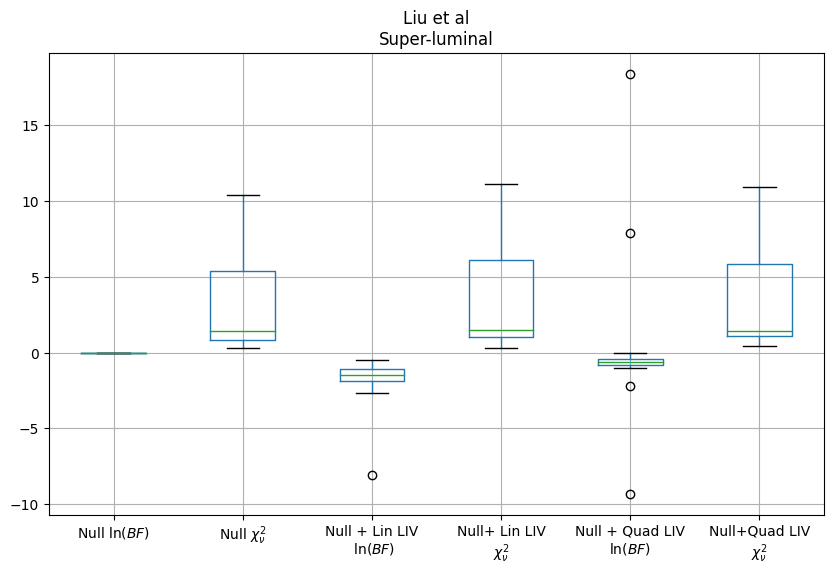

In [23]:
plt.figure(figsize=(10, 6))
temp= final.drop(['E0', 'redshift'], inplace=False, axis=1)
temp.columns = ['Null $\ln(BF)$', 'Null $\chi^2_{\\nu}$', 'Null + Lin LIV\n $\ln(BF)$', 'Null+ Lin LIV\n$\chi^2_{\\nu}$', 'Null + Quad LIV\n$\ln(BF)$', 'Null+Quad LIV\n$\chi^2_{\\nu}$']

temp.boxplot()
# plt.yticks
plt.title('Liu et al\nSuper-luminal')
# plt.ylim(-20, 20)
plt.show()